 SmartBike TimeAdvisor – Dagbaseret 

Denne notebook bruger daglige cykeldata til at forudsige hvor mange udlejninger der forventes en given dag, baseret på vejr og tidspunkt. Målet er at finde de bedste dage til at udleje cykler.

In [37]:
# Importer biblioteker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [38]:
# Indlæs datasættet
df = pd.read_csv('../data/raw/day.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df = df.drop(['instant', 'casual', 'registered', 'atemp'], axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


 # EDA – Dataforståelse

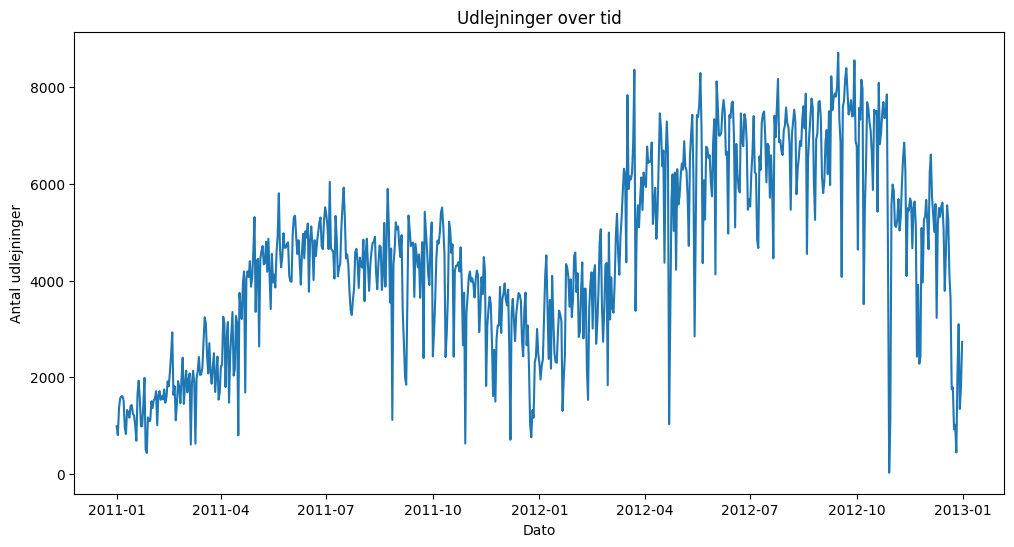

In [39]:
# Udlejninger over tid
plt.figure(figsize=(12,6))
plt.plot(df['dteday'], df['cnt'])
plt.title('Udlejninger over tid')
plt.xlabel('Dato')
plt.ylabel('Antal udlejninger')
plt.show()

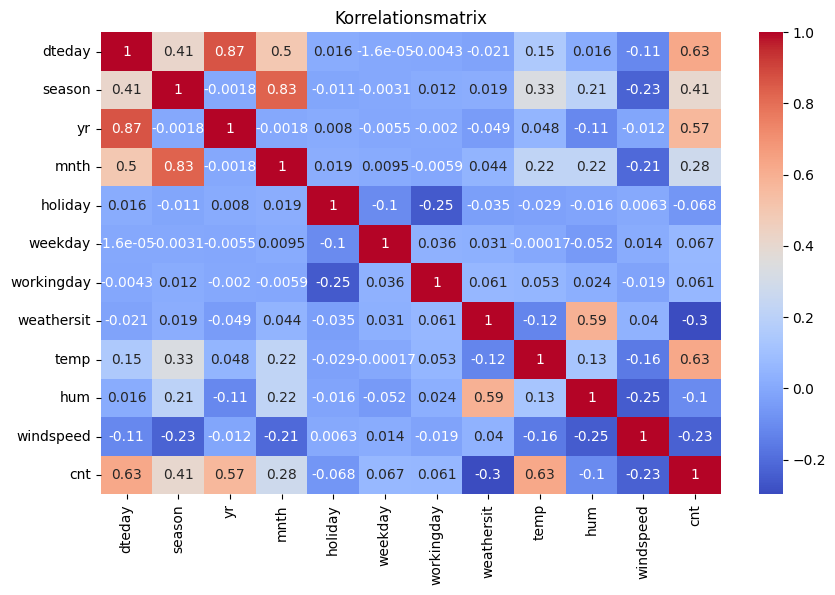

In [40]:
# Korrelationsmatrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

##  Modellering – Random Forest

In [41]:
# One-hot encode ugedag og sæson
df = pd.get_dummies(df, columns=['season', 'weekday'], drop_first=True)

In [42]:
# Features og target
features = [col for col in df.columns if col not in ['cnt', 'dteday']]
X = df[features]
y = df['cnt']

In [43]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Træn Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

MSE: 470181.63
R²: 0.88


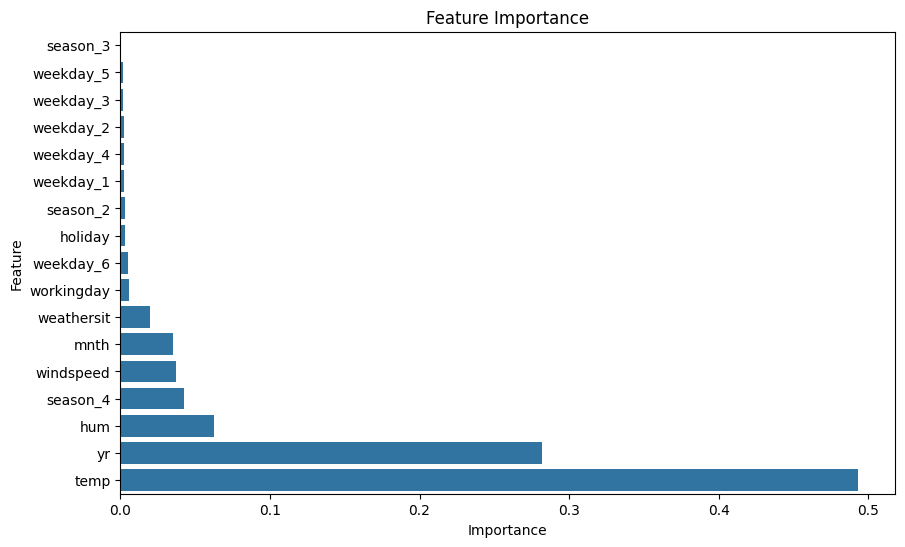

In [45]:
# Vigtighed af features
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()